# set env

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pickle

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [2]:
y_lab = 'good'

train_set = pd.read_csv('processed_data/train_set.csv', index_col = 0)
test_set = pd.read_csv('processed_data/test_set.csv', index_col = 0)
pd_feature = pd.read_csv('processed_data/pd_feature.csv', index_col = 0)
reference = pd.read_csv('processed_data/reference_categories.csv', index_col = 0)

In [3]:
#pd_feature_with_ref
pd_feature_with_ref= pd_feature['feature'].to_list()
pd_feature_with_ref

['home_ownership:MORTGAGE',
 'home_ownership:OWN',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:AR_MI_PA_OH_MN',
 'addr_state:CA',
 'addr_state:GA_WA_OR',
 'addr_state:IL_CT',
 'addr_state:KS_SC_CO_VT_AK_MS',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'addr_state:NM_VA',
 'addr_state:NY',
 'addr_state:OK_TN_MO_LA_MD_NC',
 'addr_state:RI_MA_DE_SD_IN',
 'addr_state:TX',
 'addr_state:UT_KY_AZ_NJ',
 'addr_state:WI_MT',
 'addr_state:WV_NH_WY_DC_ME_ID',
 'verification_status:Not Verified',
 'verification_status:Source Verified',
 'verification_status:Verified',
 'purpose:credit_card',
 'purpose:debt_consolidation',
 'purpose:educ__sm_b__ren_en__mov',
 'purpose:major_purch__car__home_impr',
 'purpose:oth__med__vacation__house__wedd',
 'initial_list_status:f',
 'initial_list_status:w',
 'term_int:36',
 'term_int:60',
 'emp_length_int:2-5',
 'emp_length_int:6-7',
 'emp_length_int:8-10',
 'emp_length_int:<=0',
 'emp_length_int:=1',
 'emp_length_int:>=10',
 'mths_since_issue_d:38.0-40',
 'mths_s

In [4]:
ref_cat = reference['reference'].to_list()
ref_cat

['home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__ren_en__mov',
 'initial_list_status:f',
 'term_int:60',
 'emp_length_int:<=0',
 'mths_since_issue_d:>=85.0',
 'int_rate:>=20.282',
 'mths_since_earliest_cr_line:<140.0',
 'delinq_2yrs:<=0',
 'inq_last_6mths:>=7',
 'open_acc:<=0',
 'pub_rec:0-2',
 'total_acc:<=27',
 'acc_now_delinq:<=0',
 'total_rev_hi_lim:<=5K',
 'annual_inc:<=20K',
 'mths_since_last_delinq:0-3',
 'dti:22.4-35',
 'mths_since_last_record:0-2']

In [5]:
X_train = train_set.loc[:,pd_feature_with_ref]
X_test = test_set.loc[:,pd_feature_with_ref]
Y_train = train_set[y_lab]
Y_test = test_set[y_lab]

In [6]:
X_train = X_train.drop(ref_cat, axis = 1)
X_train.head()


,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:AR_MI_PA_OH_MN,addr_state:CA,addr_state:GA_WA_OR,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:RI_MA_DE_SD_IN,addr_state:TX,addr_state:UT_KY_AZ_NJ,addr_state:WI_MT,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:major_purch__car__home_impr,purpose:oth__med__vacation__house__wedd,initial_list_status:w,term_int:36,emp_length_int:2-5,emp_length_int:6-7,emp_length_int:8-10,emp_length_int:=1,emp_length_int:>=10,mths_since_issue_d:38.0-40,mths_since_issue_d:40.0-42,mths_since_issue_d:42.0-49,mths_since_issue_d:49.0-53,mths_since_issue_d:53.0-65,mths_since_issue_d:65.0-85,mths_since_issue_d:<=38,int_rate:12.026-15.74,int_rate:15.741-20.281,int_rate:9.548-12.025,int_rate:<9.548,mths_since_earliest_cr_line:140.0-165,mths_since_earliest_cr_line:165.0-248,mths_since_earliest_cr_line:248.0-271,mths_since_earliest_cr_line:>353,delinq_2yrs:1-3,delinq_2yrs:>=4,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:<=0,open_acc:1-3,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:4-12,open_acc:>=31,pub_rec:3-4,pub_rec:>=5,total_acc:28-51,total_acc:>=52,acc_now_delinq:>=1,total_rev_hi_lim:10.0K-20K,total_rev_hi_lim:20.0K-30K,total_rev_hi_lim:30.0K-40K,total_rev_hi_lim:40.0K-55K,total_rev_hi_lim:5.0K-10K,total_rev_hi_lim:55.0K-95K,total_rev_hi_lim:>=95K,annual_inc:100.0K-120K,annual_inc:120.0K-140K,annual_inc:20.0K-50K,annual_inc:50.0K-60K,annual_inc:60.0K-70K,annual_inc:70.0K-80K,annual_inc:80.0K-90K,annual_inc:90.0K-100K,annual_inc:>=140K,mths_since_last_delinq:31-56,mths_since_last_delinq:4-30,mths_since_last_delinq:>=57,mths_since_last_delinq:Missing,dti:1.4-3.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:3.5-7.7,dti:7.7-10.5,dti:<=1.4,dti:>=35.0,mths_since_last_record:21-31,mths_since_last_record:3-20,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86.0,mths_since_last_record:Missing
279464,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
341098,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
435552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
34346,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
54308,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


# Modeling

In [7]:
from sklearn import linear_model
import scipy.stats as stats

class LogisticRegression_with_p_values:
    
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)
    def fit(self, X,y):
        self.model.fit(X,y)
        #calculate P-values
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stats.norm.sf(abs(x)) * 2 for x in z_scores]
        #
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values
        self.feature_name = X.columns.values
        
    def summary(self):
        tb = pd.DataFrame(columns= ['feature'], data = self.feature_name)
        tb['coefficient'] = np.transpose(self.coef_)
        # revalue the index to make the df index starts from 1, like in R
        tb.index = tb.index + 1
        # add the Intercept in index 0
        tb.loc[0] = ['Intercept', self.intercept_[0]]
        #sort idx
        tb = tb.sort_index() 
        # p_values
        tb['p_value'] = np.append(np.nan, np.array(self.p_values))
        
        return tb
    
    def test_result(self, Y_test):
        pred = self.model.predict(X_test)
        prob = self.model.predict_proba(X_test)[:][:,1]# prob of being "being "1"
        
        actual =np.array(Y_test)
        #result table
        result = pd.DataFrame(
            columns= ['actual', 'pred', 'prob'],
            data = np.transpose([ actual , pred , prob ]) 
                )
        # get a sorted table

        ## sort the prob
        ### to calculate GINI and KS, sort the prob by ascending
        result_sorted = result.sort_values('prob').reset_index() # automatically save orig_idx when reset
        ## cumulated count
        result_sorted['cumul_N_total'] = result_sorted.index+1
        result_sorted['cumul_N_good'] = result_sorted['actual'].cumsum()
        result_sorted['cumul_N_bad'] = result_sorted['cumul_N_total']-result_sorted['cumul_N_good']
        ## cumulated percent

        result_sorted['cumul_perc_total'] = result_sorted['cumul_N_total'] / result_sorted.shape[0]
        result_sorted['cumul_perc_good'] = result_sorted['cumul_N_good'] / result_sorted['cumul_N_good'].max()
        result_sorted['cumul_perc_bad'] = result_sorted['cumul_N_bad'] / result_sorted['cumul_N_bad'].max()

        # metrics
        P = actual == 1
        N = actual == 0
        TPR = np.mean(P & pred == 1) #TP / p
        FPR = np.mean(N & pred == 1) #FP / N
        from sklearn.metrics import roc_auc_score 
        AUC = roc_auc_score(actual, prob) 
        GINI = AUC*2 - 1
        KS = max(result_sorted['cumul_perc_bad'] - result_sorted['cumul_perc_good'])

        metrics = {"TPR":TPR, 'FPR':FPR, 'AUC':AUC, 'GINI':GINI, 'KS':KS}
        return result, result_sorted, metrics


In [8]:
mod = LogisticRegression_with_p_values()
mod.fit(X_train, Y_train)

/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## summary table

In [9]:
summary = mod.summary()
summary

,feature,coefficient,p_value
0,Intercept,-1.599657,NaN
1,home_ownership:MORTGAGE,0.121462,1.029641e-21
2,home_ownership:OWN,0.077004,1.228101e-04
3,addr_state:AR_MI_PA_OH_MN,0.159555,1.285822e-12
4,addr_state:CA,0.098369,3.482053e-06
5,addr_state:GA_WA_OR,0.194282,2.650268e-13
6,addr_state:IL_CT,0.294355,7.996213e-24
7,addr_state:KS_SC_CO_VT_AK_MS,0.348775,1.318304e-29
8,addr_state:NM_VA,0.095820,2.998947e-03
9,addr_state:NY,0.067858,4.929297e-03


## feature selection
select out the features with P < 0.05, make sure if one sub class is selected, the whole group should be selected

In [10]:
cutoff = 0.05 # the p_value criteria
idx = summary['p_value'] < cutoff
col_selected = summary[idx]
col_selected['group'] = col_selected['feature'].str.split(':').str[0]

group_selected = col_selected['group'].unique().tolist()

<ipython-input-10-c60416ab4f81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_selected['group'] = col_selected['feature'].str.split(':').str[0]


### selected features

In [11]:
# create a group col in pd_feature and reference (mother set) to allow later select
pd_feature['group'] = pd_feature['feature'].str.split(':').str[0]
reference['group'] = reference['reference'].str.split(':').str[0]

In [12]:
# features
# using the groups we got above to create an idx on pd_feature
idx = [ row in group_selected for row in pd_feature['group'].tolist()]

#select features
col_selected_af_model = pd_feature['feature'][idx].tolist()
col_selected_af_model

['home_ownership:MORTGAGE',
 'home_ownership:OWN',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:AR_MI_PA_OH_MN',
 'addr_state:CA',
 'addr_state:GA_WA_OR',
 'addr_state:IL_CT',
 'addr_state:KS_SC_CO_VT_AK_MS',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'addr_state:NM_VA',
 'addr_state:NY',
 'addr_state:OK_TN_MO_LA_MD_NC',
 'addr_state:RI_MA_DE_SD_IN',
 'addr_state:TX',
 'addr_state:UT_KY_AZ_NJ',
 'addr_state:WI_MT',
 'addr_state:WV_NH_WY_DC_ME_ID',
 'verification_status:Not Verified',
 'verification_status:Source Verified',
 'verification_status:Verified',
 'purpose:credit_card',
 'purpose:debt_consolidation',
 'purpose:educ__sm_b__ren_en__mov',
 'purpose:major_purch__car__home_impr',
 'purpose:oth__med__vacation__house__wedd',
 'initial_list_status:f',
 'initial_list_status:w',
 'term_int:36',
 'term_int:60',
 'emp_length_int:2-5',
 'emp_length_int:6-7',
 'emp_length_int:8-10',
 'emp_length_int:<=0',
 'emp_length_int:=1',
 'emp_length_int:>=10',
 'mths_since_issue_d:38.0-40',
 'mths_s

In [13]:
# reference
# using the groups we got above to create an idx on pd_feature
idx = [ row in group_selected for row in reference['group'].tolist()]

#select reference
ref_cat_af_model = reference['reference'][idx].tolist()
ref_cat_af_model

['home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__ren_en__mov',
 'initial_list_status:f',
 'term_int:60',
 'emp_length_int:<=0',
 'mths_since_issue_d:>=85.0',
 'int_rate:>=20.282',
 'mths_since_earliest_cr_line:<140.0',
 'inq_last_6mths:>=7',
 'total_acc:<=27',
 'total_rev_hi_lim:<=5K',
 'annual_inc:<=20K',
 'mths_since_last_delinq:0-3',
 'dti:22.4-35',
 'mths_since_last_record:0-2']

In [14]:
X_train = train_set.loc[:,col_selected_af_model].drop(ref_cat_af_model, axis = 1)
X_test = test_set.loc[:,col_selected_af_model].drop(ref_cat_af_model, axis = 1)
X_train.head()

,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:AR_MI_PA_OH_MN,addr_state:CA,addr_state:GA_WA_OR,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:RI_MA_DE_SD_IN,addr_state:TX,addr_state:UT_KY_AZ_NJ,addr_state:WI_MT,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:major_purch__car__home_impr,purpose:oth__med__vacation__house__wedd,initial_list_status:w,term_int:36,emp_length_int:2-5,emp_length_int:6-7,emp_length_int:8-10,emp_length_int:=1,emp_length_int:>=10,mths_since_issue_d:38.0-40,mths_since_issue_d:40.0-42,mths_since_issue_d:42.0-49,mths_since_issue_d:49.0-53,mths_since_issue_d:53.0-65,mths_since_issue_d:65.0-85,mths_since_issue_d:<=38,int_rate:12.026-15.74,int_rate:15.741-20.281,int_rate:9.548-12.025,int_rate:<9.548,mths_since_earliest_cr_line:140.0-165,mths_since_earliest_cr_line:165.0-248,mths_since_earliest_cr_line:248.0-271,mths_since_earliest_cr_line:>353,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:<=0,total_acc:28-51,total_acc:>=52,total_rev_hi_lim:10.0K-20K,total_rev_hi_lim:20.0K-30K,total_rev_hi_lim:30.0K-40K,total_rev_hi_lim:40.0K-55K,total_rev_hi_lim:5.0K-10K,total_rev_hi_lim:55.0K-95K,total_rev_hi_lim:>=95K,annual_inc:100.0K-120K,annual_inc:120.0K-140K,annual_inc:20.0K-50K,annual_inc:50.0K-60K,annual_inc:60.0K-70K,annual_inc:70.0K-80K,annual_inc:80.0K-90K,annual_inc:90.0K-100K,annual_inc:>=140K,mths_since_last_delinq:31-56,mths_since_last_delinq:4-30,mths_since_last_delinq:>=57,mths_since_last_delinq:Missing,dti:1.4-3.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:3.5-7.7,dti:7.7-10.5,dti:<=1.4,dti:>=35.0,mths_since_last_record:21-31,mths_since_last_record:3-20,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86.0,mths_since_last_record:Missing
279464,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
341098,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
435552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
34346,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
54308,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


## Re-fit model

In [15]:
mod_final = LogisticRegression_with_p_values()
mod_final.fit(X_train, Y_train)

/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
summary = mod_final.summary()
summary

,feature,coefficient,p_value
0,Intercept,-1.726363,NaN
1,home_ownership:MORTGAGE,0.122089,5.811267e-22
2,home_ownership:OWN,0.073694,2.325536e-04
3,addr_state:AR_MI_PA_OH_MN,0.155171,4.474558e-12
4,addr_state:CA,0.095189,6.767859e-06
5,addr_state:GA_WA_OR,0.190961,6.021733e-13
6,addr_state:IL_CT,0.291465,1.910721e-23
7,addr_state:KS_SC_CO_VT_AK_MS,0.343183,7.813634e-29
8,addr_state:NM_VA,0.093430,3.773944e-03
9,addr_state:NY,0.061618,1.044822e-02


# Model Evaluation

## result table

In [17]:
result, result_sorted, metrics = mod_final.test_result(Y_test)
result.head()


,actual,pred,prob
0,1.0,1.0,0.956607
1,1.0,1.0,0.956832
2,0.0,1.0,0.872811
3,1.0,1.0,0.881985
4,1.0,1.0,0.920059


In [18]:
result_sorted.head(20)

,index,actual,pred,prob,cumul_N_total,cumul_N_good,cumul_N_bad,cumul_perc_total,cumul_perc_good,cumul_perc_bad
0,22662,0.0,0.0,0.339384,1,0.0,1.0,0.000011,0.000000,0.000098
1,2548,1.0,0.0,0.393419,2,1.0,1.0,0.000021,0.000012,0.000098
2,65686,1.0,0.0,0.415009,3,2.0,1.0,0.000032,0.000024,0.000098
3,86968,1.0,0.0,0.429111,4,3.0,1.0,0.000043,0.000036,0.000098
4,16727,1.0,0.0,0.444441,5,4.0,1.0,0.000054,0.000048,0.000098
5,13168,1.0,0.0,0.445015,6,5.0,1.0,0.000064,0.000060,0.000098
6,36856,0.0,0.0,0.451020,7,5.0,2.0,0.000075,0.000060,0.000196
7,90394,1.0,0.0,0.452092,8,6.0,2.0,0.000086,0.000072,0.000196
8,37895,1.0,0.0,0.467022,9,7.0,2.0,0.000097,0.000084,0.000196
9,12103,0.0,0.0,0.468191,10,7.0,3.0,0.000107,0.000084,0.000293


In [19]:
metrics

{'TPR': 0.8902388024491459,
 'FPR': 0.10957890560494118,
 'AUC': 0.6985028664240295,
 'GINI': 0.39700573284805896,
 'KS': 0.2895797300150418}

## Confusion Matrix

In [20]:
tr_05 = pd.crosstab(result['actual'], result['pred'], rownames = ['Actual'], colnames = ['Pred'])
tr_05

# change Threshold
#tr = 0.9
#result['tr_0.9'] = np.where(result['prob']>=0.9,1,0)
#tr_09 = pd.crosstab(result['actual'], result['tr_0.9'], rownames= ['Actual'], colnames= ['Pred'])
#tr_09

Pred,0.0,1.0
Actual,,
0.0,7,10219
1.0,10,83021


## ROC, AUC

ROC: TPR as a function of FPR

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
# FRP, TPR, TR
fpr, tpr, thresholds = roc_curve(result['actual'], result['prob'])

#AUC
AUC = roc_auc_score(result['actual'], result['prob'])

Text(0, 0.5, 'True Positive Rate')

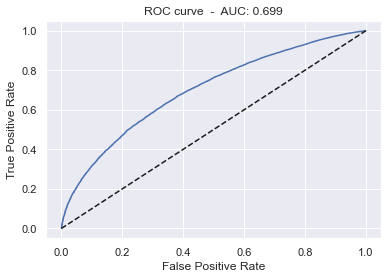

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(fpr , tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k') # diagnol line
plt.title('ROC curve'+'  -  AUC: ' + str(round(AUC,3)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## GINI
GINI = (AUC-0.5) / 0.5

the cumulative proportion of being "0" as a function of population

In [23]:
GINI = AUC*2 - 1
GINI

0.39700573284805896

Text(0.5, 1.0, 'GINI curve  -  score: 0.397')

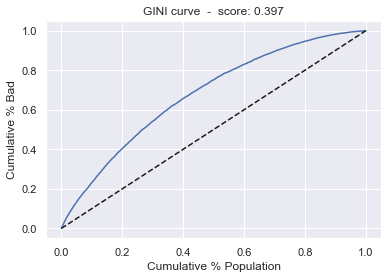

In [24]:
# plot GINI
plt.plot(result_sorted['cumul_perc_total'], result_sorted['cumul_perc_bad'])
plt.plot(result_sorted['cumul_perc_total'], result_sorted['cumul_perc_total'], linestyle = '--', color = 'k') # diagnol line

plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('GINI curve'+'  -  score: ' + str(round(GINI,3)))

# best score= 1, worst score= 0


## Kolmogorov Smirnov
KS = the farthest distance between the cumululative % of bad and the cumululative % of good. 

ie. how far the model can seperate distributions of bad and distributions of good.

In [25]:

KS = max(result_sorted['cumul_perc_bad'] - result_sorted['cumul_perc_good'])
KS
# best score = 1 , worst = 0

0.2895797300150418

Text(0.5, 1.0, 'Kolmogorov-Smirnov  -  score: 0.29')

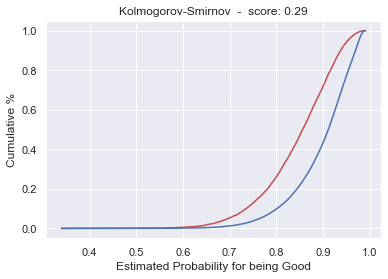

In [26]:
plt.plot(result_sorted['prob'], result_sorted['cumul_perc_bad'], color = 'r') # how good the model catch "bad"
plt.plot(result_sorted['prob'], result_sorted['cumul_perc_good'], color = 'b') # how good the model catch "good"

plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov'+'  -  score: ' + str(round(KS,3)))
# We name the graph "Kolmogorov-Smirnov".

# Credit Score

In [27]:
X_test_w_ref = test_set[col_selected_af_model]
# insert a col representing intercept for later calculating credit score
X_test_w_ref.insert(0, 'Intercept', 1)

## get coefficient

In [28]:
# refference cat and its coefficient
ref_coef = pd.DataFrame(columns= ['feature'],
                        data = np.transpose( [np.array(ref_cat_af_model)] )
                       )
ref_coef['coefficient'] = 0
ref_coef['p_value'] = np.nan

# concat the ref and other features
score = pd.concat([summary, ref_coef]).reset_index(drop = True)

# get the parent group (feature bf dumminized)
score['group'] = score['feature'].str.split(':').str[0]
#score['feature'] = score['feature'].str.split(':').str[1]
score

,feature,coefficient,p_value,group
0,Intercept,-1.726363,NaN,Intercept
1,home_ownership:MORTGAGE,0.122089,5.811267e-22,home_ownership
2,home_ownership:OWN,0.073694,2.325536e-04,home_ownership
3,addr_state:AR_MI_PA_OH_MN,0.155171,4.474558e-12,addr_state
4,addr_state:CA,0.095189,6.767859e-06,addr_state
...,...,...,...,...
96,total_rev_hi_lim:<=5K,0.000000,NaN,total_rev_hi_lim
97,annual_inc:<=20K,0.000000,NaN,annual_inc
98,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq
99,dti:22.4-35,0.000000,NaN,dti


## coefficient to credit score

In [29]:
# Scaler (coef to score)

lr_score = 300
ur_score = 850
score_range = ur_score - lr_score

# the lower bound coef 
min_sum_coef = score.groupby('group')['coefficient'].min().sum() #lowest coefficients sum one customer can get
# the upper bound coef 
max_sum_coef = score.groupby('group')['coefficient'].max().sum() #highest coefficients sum one customer can get
coef_range = max_sum_coef - min_sum_coef

scaler = score_range / coef_range

In [30]:
# transform coef to score
score['credit_score_orig'] = score['coefficient'] * scaler

# get "minimum score" (transform the intercept base to minimum base)
itercept_coef = score['coefficient'][0]
min_score_intercept = (itercept_coef - min_sum_coef) / coef_range * score_range + lr_score 
score['credit_score_orig'][0] = min_score_intercept #possible lowest score one can get (without cosidering any feature)

# round
score['credit_score_adj'] = score['credit_score_orig'].round()

# check possible highest and lowest score
min_score = score.groupby('group')['credit_score_adj'].min().sum() #possible lowest score one can get (cosidering features)
max_score = score.groupby('group')['credit_score_adj'].max().sum() #possible highest score one can get (cosidering features)

print(min_score, max_score)

300.0 851.0


<ipython-input-30-2aa82edaf39b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['credit_score_orig'][0] = min_score_intercept #possible lowest score one can get (without cosidering any feature)


In [31]:
# the sum is 300 and 849, need to adjust, adjust it!
score['adj_diff'] = score['credit_score_orig'] - score['credit_score_adj']
score.sort_values('credit_score_adj', ascending= False).sort_values('group')

,feature,coefficient,p_value,group,credit_score_orig,credit_score_adj,adj_diff
0,Intercept,-1.726363,NaN,Intercept,308.624729,309.0,-0.375271
85,addr_state:ND_NE_IA_NV_FL_HI_AL,0.000000,NaN,addr_state,0.000000,0.0,0.000000
9,addr_state:NY,0.061618,1.044822e-02,addr_state,4.640162,5.0,-0.359838
13,addr_state:UT_KY_AZ_NJ,0.095624,1.139271e-04,addr_state,7.200976,7.0,0.200976
8,addr_state:NM_VA,0.093430,3.773944e-03,addr_state,7.035752,7.0,0.035752
...,...,...,...,...,...,...,...
50,total_rev_hi_lim:20.0K-30K,0.045595,7.627529e-02,total_rev_hi_lim,3.433535,3.0,0.433535
54,total_rev_hi_lim:55.0K-95K,0.077596,2.691421e-02,total_rev_hi_lim,5.843380,6.0,-0.156620
86,verification_status:Verified,0.000000,NaN,verification_status,0.000000,0.0,0.000000
17,verification_status:Source Verified,-0.003721,7.821732e-01,verification_status,-0.280210,-0.0,-0.280210


In [32]:
score.groupby('group')['credit_score_adj'].max()

group
Intercept                      309.0
addr_state                      38.0
annual_inc                      41.0
dti                             25.0
emp_length_int                  11.0
home_ownership                   9.0
initial_list_status              4.0
inq_last_6mths                  63.0
int_rate                       133.0
mths_since_earliest_cr_line      8.0
mths_since_issue_d              77.0
mths_since_last_delinq          10.0
mths_since_last_record          55.0
purpose                         36.0
term_int                         7.0
total_acc                        0.0
total_rev_hi_lim                19.0
verification_status              6.0
Name: credit_score_adj, dtype: float64

In [33]:
# decision
score['credit_score_adj'][68] = 30
# check possible highest and lowest score
min_score = score.groupby('group')['credit_score_adj'].min().sum() #possible lowest score one can get (cosidering features)
max_score = score.groupby('group')['credit_score_adj'].max().sum() #possible highest score one can get (cosidering features)

print(min_score, max_score)

300.0 871.0


<ipython-input-33-d63027f1f0a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['credit_score_adj'][68] = 30


In [34]:
score['credit_score_final'] = score['credit_score_adj']

## calculate credit score

In [35]:
# prepare X_test
# slice the X_test with the score table to make sure the dimension fits
X_test_w_ref = X_test_w_ref[score['feature'].values]
#check if the colnames are the same
X_test_w_ref.columns.values == score['feature'].values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [36]:
# prepare score card
score_card = score['credit_score_final'].values
# reshape to make able to dot
nrow = score_card.shape[0]
score_card = score_card.reshape((nrow,1))

In [37]:
# Calculate score
score_calculated = X_test_w_ref.dot(score_card)
score_calculated.columns = ['credit_score']
score_calculated.head()

,credit_score
415559,672.0
382821,698.0
108693,608.0
202029,616.0
292125,623.0


## Credit score to Sum of coefficient (reversely calculate)

In [38]:
sum_coef_from_score = ((score_calculated - lr_score) / score_range * coef_range) + min_sum_coef

sum_coef_from_score.head()

,credit_score
415559,3.099002
382821,3.444263
108693,2.249127
202029,2.355361
292125,2.448316


## Sum of coefficient to Probability (PD)

In [39]:
# calculate prob from sum of coef of each customer
sum_coef = sum_coef_from_score # can be any, just here we just reversely calculated the sum_coef form scores, so use it

prob_from_coef = np.exp(sum_coef) / (np.exp(sum_coef) + 1)


In [40]:
# compare below two chunks to see if we get same prob!
prob_from_coef.head()

,credit_score
415559,0.956852
382821,0.969060
108693,0.904575
202029,0.913359
292125,0.920438


In [41]:
result.head()

,actual,pred,prob
0,1.0,1.0,0.956607
1,1.0,1.0,0.956832
2,0.0,1.0,0.872811
3,1.0,1.0,0.881985
4,1.0,1.0,0.920059


# setting cut off on credit score

In [42]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(result['actual'], result['prob'])

cutoffs = pd.DataFrame(columns= ['thresholds', 'fpr', 'tpr'], data = np.transpose([thresholds, fpr, tpr]))

cutoffs.head(10)

,thresholds,fpr,tpr
0,1.991737,0.000000,0.000000
1,0.991737,0.000000,0.000012
2,0.989050,0.000000,0.000578
3,0.989044,0.000098,0.000578
4,0.988596,0.000098,0.000927
5,0.988562,0.000196,0.000927
6,0.987533,0.000196,0.002120
7,0.987532,0.000293,0.002120
8,0.987012,0.000293,0.002999
9,0.986988,0.000391,0.002999


## threshold ( a probability ) to score

In [43]:
cutoffs['score'] = (( np.log( cutoffs['thresholds'] / (1 - cutoffs['thresholds'])
                            ) - min_sum_coef 
                    ) * score_range / coef_range + lr_score).round()

/Users/warren/opt/anaconda3/envs/credit_risk/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [44]:
# adjust the first thresholds, just for clear, not certainly needed
cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16) 
cutoffs['score'][0] = cutoffs['score'].max()

In [45]:
cutoffs.head()

,thresholds,fpr,tpr,score
0,1.000000,0.000000,0.000000,799.0
1,0.991737,0.000000,0.000012,799.0
2,0.989050,0.000000,0.000578,778.0
3,0.989044,0.000098,0.000578,778.0
4,0.988596,0.000098,0.000927,775.0


## Number of application approved

In [46]:
def n_approved(p):
    return np.where(result['prob'] >= p, 1, 0).sum()

In [47]:
cutoffs['N_approved'] = cutoffs['thresholds'].apply(n_approved)
cutoffs['N_rejected'] = result.shape[0] - cutoffs['N_approved']
cutoffs['approval_rate'] = cutoffs['N_approved']/result.shape[0]
cutoffs['rejection_rate'] = 1 - cutoffs['approval_rate']

In [48]:
cutoffs.head(20)

,thresholds,fpr,tpr,score,N_approved,N_rejected,approval_rate,rejection_rate
0,1.000000,0.000000,0.000000,799.0,0,93257,0.000000,1.000000
1,0.991737,0.000000,0.000012,799.0,1,93256,0.000011,0.999989
2,0.989050,0.000000,0.000578,778.0,48,93209,0.000515,0.999485
3,0.989044,0.000098,0.000578,778.0,49,93208,0.000525,0.999475
4,0.988596,0.000098,0.000927,775.0,78,93179,0.000836,0.999164
5,0.988562,0.000196,0.000927,774.0,79,93178,0.000847,0.999153
6,0.987533,0.000196,0.002120,768.0,178,93079,0.001909,0.998091
7,0.987532,0.000293,0.002120,768.0,179,93078,0.001919,0.998081
8,0.987012,0.000293,0.002999,765.0,252,93005,0.002702,0.997298
9,0.986988,0.000391,0.002999,765.0,253,93004,0.002713,0.997287


# output file

## Save model

In [49]:
pickle.dump(mod_final, open('model_result/pd_model.sav', 'wb'))

## Save result

In [50]:
# scored test data with reference
X_test_w_ref = X_test_w_ref.reset_index()
result = result.reset_index(drop = True)
score_calculated = score_calculated.reset_index(drop = True)

final_output_df = pd.concat([X_test_w_ref, result, score_calculated], axis = 1)
final_output_df.to_csv('model_result/test_with_ref_scored.csv')

In [51]:
# different cutoffs with its approval and reject rate
cutoffs.to_csv('model_result/cutoff_appr_rejc_test.csv')

In [52]:
#features after feature selection
pd.DataFrame(columns=['feature'], data = col_selected_af_model).to_csv('model_result/pd_feature_after_selected.csv')
## reference categories
pd.DataFrame(columns=['reference'], data = ref_cat_af_model).to_csv('model_result/pd_reference_after_selected.csv')

In [53]:
#score card
score_final = score.sort_values('feature')[['group','feature','credit_score_final','coefficient','p_value']]
score_final['value'] = score_final['feature'].str.split(':').str[1]
score_final = score_final[['group', 'value' ,'feature','credit_score_final','coefficient','p_value']]
score_final.columns = ['group', 'value' ,'feature','credit_score','coefficient','p_value']
score_final
score_final.to_csv('model_result/score_card.csv')

In [54]:
score.sort_values('feature')

,feature,coefficient,p_value,group,credit_score_orig,credit_score_adj,adj_diff,credit_score_final
0,Intercept,-1.726363,NaN,Intercept,308.624729,309.0,-0.375271,309.0
3,addr_state:AR_MI_PA_OH_MN,0.155171,4.474558e-12,addr_state,11.685212,12.0,-0.314788,12.0
4,addr_state:CA,0.095189,6.767859e-06,addr_state,7.168200,7.0,0.168200,7.0
5,addr_state:GA_WA_OR,0.190961,6.021733e-13,addr_state,14.380343,14.0,0.380343,14.0
6,addr_state:IL_CT,0.291465,1.910721e-23,addr_state,21.948819,22.0,-0.051181,22.0
...,...,...,...,...,...,...,...,...
96,total_rev_hi_lim:<=5K,0.000000,NaN,total_rev_hi_lim,0.000000,0.0,0.000000,0.0
55,total_rev_hi_lim:>=95K,0.253853,5.568588e-06,total_rev_hi_lim,19.116461,19.0,0.116461,19.0
16,verification_status:Not Verified,0.085730,5.099391e-09,verification_status,6.455923,6.0,0.455923,6.0
17,verification_status:Source Verified,-0.003721,7.821732e-01,verification_status,-0.280210,-0.0,-0.280210,-0.0
